# Carbon Emission Prediction Using Machine Learing

Carbon emission is said to be one of the most critical reasons of global warming. This project aims to provide a country-wise overview of the future trends of carbon emission as well as a global trend prediction for next ten years. The approach is to analyse the historical data for these countries various economic factors, learn them, and make future predictions.

Dataset:
https://www.kaggle.com/manchunhui/world-co2-emissions-analysis/

# Summary

After cleaning up the data the next challenge is to select the best model to train the dataset and make predictions. This notebook contains the steps of selecting the most important features from the dataset and improvising the random forest regression model. 

## Import libraries and read dataset

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import numpy.random as nr
import sys
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn.model_selection as ms
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import feature_selection as fs

In [2]:
# Load the cleaned and preprocessed dataset
data = pd.read_csv('../dataset/processed/data_preprocessed.csv')

In [3]:
# View the dataset shape
data.shape

(7040, 25)

In [4]:
# Check the data types
data.dtypes

CountryCode                 float64
Year                        float64
AIR_TRANS_FREIGHT           float64
ALT_NUCL_EN_PERC            float64
CEREAL_YIELD                float64
CO2_EM_PC                   float64
CO2_EM_TOTAL                float64
COMB_REN_WASTE_PERC         float64
ELEC_PROD_COAL_PERC         float64
ELEC_PROD_HYDRO_PERC        float64
ELEC_PROD_NAT_GAS_PERC      float64
ELEC_PROD_NUCL_PERC         float64
ELEC_PROD_OIL_PERC          float64
ELEC_PROD_RENW_SRC_PERC     float64
EN_USE_PC                   float64
FOSSIL_FUEL_EN_CONS_PERC    float64
FUEL_IMPORT_PERC            float64
GDP_GROWTH_PERC             float64
GDP_PC                      float64
METHANE_EM                  float64
NO2_EM                      float64
POP_GROWTH_PERC             float64
POP_URBAN_AGG               float64
URBAN_POP_GROWTH            float64
URBAN_POP_TOTAL             float64
dtype: object

In [5]:
# Dataset statistics
data.describe()

,CountryCode,Year,AIR_TRANS_FREIGHT,ALT_NUCL_EN_PERC,CEREAL_YIELD,CO2_EM_PC,CO2_EM_TOTAL,COMB_REN_WASTE_PERC,ELEC_PROD_COAL_PERC,ELEC_PROD_HYDRO_PERC,...,FOSSIL_FUEL_EN_CONS_PERC,FUEL_IMPORT_PERC,GDP_GROWTH_PERC,GDP_PC,METHANE_EM,NO2_EM,POP_GROWTH_PERC,POP_URBAN_AGG,URBAN_POP_GROWTH,URBAN_POP_TOTAL
count,7040.0000,7040.000000,7040.000000,7040.000000,7040.000000,7040.000000,7.040000e+03,7040.000000,7040.000000,7040.000000,...,7040.000000,7040.000000,7040.000000,7040.000000,7.040000e+03,7.040000e+03,7040.000000,7040.000000,7040.000000,7040.000000
mean,79.5000,1992.500000,3702.112907,5.451944,2606.102441,4.663404,1.132924e+06,23.771392,18.385797,30.896926,...,66.836395,13.109117,3.797609,6959.521142,3.948414e+05,1.666575e+05,1.717097,21.740549,2.765706,53.889926
std,46.1904,12.699327,14022.342539,8.282755,1628.382506,5.370064,2.881979e+06,26.954099,25.080587,29.640640,...,27.805137,8.062508,4.868358,12066.504198,9.650330e+05,3.880231e+05,1.191852,14.306629,3.044698,22.619147
min,0.0000,1971.000000,0.000000,0.000000,107.200000,0.004333,2.200200e+01,0.000000,0.000000,0.000000,...,1.639733,0.012810,-64.047107,69.233327,3.414480e+00,2.087546e+00,-9.080638,1.221748,-187.141962,4.005000
25%,39.7500,1981.750000,21.421750,0.824997,1396.400000,0.829630,8.242499e+03,2.268305,0.000000,7.296276,...,44.856445,8.807738,1.996691,777.333009,8.171863e+03,3.631433e+03,0.784705,13.031132,1.266748,34.751449
50%,79.5000,1992.500000,179.560502,2.401774,2205.100000,2.693024,5.890302e+04,11.186967,2.978696,19.560477,...,75.558918,11.942561,3.897323,2133.368871,2.905675e+04,1.268365e+04,1.710362,18.545102,2.687682,53.989000
75%,119.2500,2003.250000,1029.599976,6.600922,3458.609692,7.070507,4.361039e+05,42.956489,33.516265,51.963377,...,89.749103,15.780125,5.805296,6801.199958,2.964825e+05,1.032129e+05,2.580322,25.247031,3.971619,72.968332
max,159.0000,2014.000000,184831.109461,71.542360,21865.500000,40.589523,2.155943e+07,98.186277,100.000000,100.000000,...,100.000000,156.177186,123.139555,118823.648369,8.014067e+06,3.260053e+06,7.786010,100.000000,48.935720,100.000000


# Preparation for model building

In [6]:
# Define a random state number for random operations in further steps
# This helps ensuding the reproducibility of the the results
random_state_num = 0

## Selection of features and label

The previous notebook illustrates the correlation between several indicators and considering the correalation plot it is noticeable that the CO2 Emission Per Capita is a dependent variable. This indicator is depended on the other independent variables. Hence, the indicators has been separated into features and label based on state of their dependency and correlation with each other. 

The indicators has been divided as follows:

Label: 
* CO2_EM_PC: CO2 Emission Per Capita 

Features:

* ALT_NUCL_EN_PERC: Alternative and nuclear energy (% of total energy use)
* AIR_TRANS_FREIGHT: Air transport, freight (million ton-km)
* COMB_REN_WASTE_PERC: Combustible renewables and waste (% of total energy)
* ELEC_PROD_COAL_PERC: Electricity production from coal sources (% of total)
* ELEC_PROD_HYDRO_PERC: Electricity production from hydroelectric sources (% of total)
* ELEC_PROD_NAT_GAS_PERC: Electricity production from natural gas sources (% of total)
* ELEC_PROD_OIL_PERC: Electricity production from oil sources (% of total)
* EN_USE_PC: Energy use (kg of oil equivalent per capita)
* FOSSIL_FUEL_EN_CONS_PERC: Fossil fuel energy consumption (% of total)
* GDP_PC: GDP per capita (current US$)
* POP_GROWTH_PERC: Population growth (annual %)
* POP_URBAN_AGG: Population in urban agglomerations of more than 1 million (% of total population)
* URBAN_POP_TOTAL: Urban population (% of total population)
* URBAN_POP_GROWTH: Urban population growth (annual %)
* METHANE_EM: Methane emissions (kt of CO2 equivalent)
* NO2_EM: Nitrous oxide emissions (thousand metric tons of CO2 equivalent)

In [7]:
label_name = ['CO2_EM_PC']
feature_names = [
'CountryCode',
'ALT_NUCL_EN_PERC',
'AIR_TRANS_FREIGHT',
'COMB_REN_WASTE_PERC',
'CEREAL_YIELD',
'ELEC_PROD_COAL_PERC',
'ELEC_PROD_HYDRO_PERC',
'ELEC_PROD_NAT_GAS_PERC',
'ELEC_PROD_NUCL_PERC',
'ELEC_PROD_OIL_PERC',
'ELEC_PROD_RENW_SRC_PERC',
'EN_USE_PC',
'FOSSIL_FUEL_EN_CONS_PERC',
'FUEL_IMPORT_PERC',
'GDP_GROWTH_PERC',
'GDP_PC',
'POP_GROWTH_PERC',
'POP_URBAN_AGG',
'URBAN_POP_TOTAL',
'URBAN_POP_GROWTH',
'METHANE_EM',
'NO2_EM'
]

## Convert features and label into numpy array

In [8]:
features = np.array(data[feature_names])
labels =  np.array(data[label_name])

## Split dataset into training and test subset

A vital part of the model building is splitting the dataset into training and testing subset. The features and label has been splitted in such way so the test subset contains the 40% of the data. These data remains unseen by the model and later used to validate the model predictions. 

In [9]:
# Split the data into training and test subsets
# Test data size is 40% of the total data
nr.seed(1)
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.4,
                                                    random_state=random_state_num)

# Model building
## Apply folding for finding out important features

In [ ]:
# Set folds for cross validation for the feature selection
nr.seed(1)
feature_folds = ms.KFold(n_splits=4, shuffle = True, random_state=random_state_num)

# Define the model
model_selector = RandomForestRegressor(random_state=random_state_num) 

# Define an objects for a model for recursive feature elimination with CV
nr.seed(1)
selector = fs.RFECV(estimator = model_selector, cv = feature_folds, scoring = 'r2', n_jobs=-1)

selector = selector.fit(X_train, np.ravel(y_train))
selector.support_

print("Ranking of features by importance:")
print(selector.ranking_)

# print the important features
ranks_transform = list(np.transpose(selector.ranking_))
chosen_features = [i for i,j in zip(feature_names,ranks_transform) if j==1]
print("Best features to choose:")
print(chosen_features)

In [15]:
# Reduce the test and training set with only important features
X_train_reduced = selector.transform(X_train)
X_test_reduced = selector.transform(X_test)

# View the dataset summary
print("Previous training set: ", X_train.shape)
print("Reduced training set: ", X_train_reduced.shape)
print("Reduced testing set: ", X_test_reduced.shape)

Previous training set:  (4224, 22)
Reduced training set:  (4224, 17)
Reduced testing set:  (2816, 17)


## Hyperparameter tuning

Random Forest is an algorithm with multiple hyperparameters which can have a range of values. In order to find the hyperparameters which would be most suitable for the current data, it is necessary to conduct hyperparameter tuning. The parameters which will be tuned in this case are:

* n_estimators - number of decision trees in the random forest
* max_features - number of features to consider at every split
* max_depth - maximum number of levels in a tree
* min_samples_split - minimum number of samples required to split a node
* min_samples_leaf - minimum number of samples required at each leaf node

The tuning is executed by applying a cross-validated evaluation of the model for different combinations of preliminary defined ranges for the parameters. The output is the model with the hyperparameters which exhibits the best R2 score compared to other parameter combinations.

Define the hyperparameter ranges to be investigated as a parameter grid (dictionary *param_grid*):

In [16]:
# Hyperparameter value definition
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

# Define grid for hyper parameter
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

RandomizedSearchCV object evaluates the R2 scores of models with randomly picked combinations from the defined hyperparameter grid. 

In [17]:
# Define cross validation folds
nr.seed(1)
inside_folds = ms.KFold(n_splits=5, shuffle = True, random_state=random_state_num)

# Define random forest regressor model object
rf_tuner = RandomForestRegressor(random_state=random_state_num)

# Perform randomized search on the grid
nr.seed(1)
rf_model = ms.RandomizedSearchCV(estimator=rf_tuner, param_distributions = param_grid,
                                 random_state=random_state_num, refit=True,
                                 cv=inside_folds, scoring = 'r2', return_train_score=True, n_jobs=-1)

After training data being fitted, a Random forest model is returned with such hyper parameter combination that allows the best R2 score for the dataset. The RandomizedSearchVC runs test on different combinations of parameters to find out the best one. Once the best hyperparameter combination is found the model is then fitted with the training data. 

In [18]:
# Fit the grid search model object with cross-validation on the data
rf_model.fit(X_train_reduced, np.ravel(y_train))

# Assign the best hyper parameter estimator
best_n_estimators = rf_model.best_estimator_.n_estimators
best_max_features = rf_model.best_estimator_.max_features

print("best number of estimators:", best_n_estimators)
print("best max features:", best_max_features)
print("max depth:", rf_model.best_estimator_.max_depth)
print("min samples split", rf_model.best_estimator_.min_samples_split)
print("min samples leaf", rf_model.best_estimator_.min_samples_leaf)

best number of estimators: 1600
best max features: sqrt
max depth: 20
min samples split 2
min samples leaf 1


## Best model selection

In [19]:
# Assign the best model returned in earlier steps
# This model will be used for final testing and predictions
rf_selected_model = rf_model.best_estimator_

## Evaluation of the choosen model

In this steps the evaluation of the selected model is performed with the reduced training dataset with important featiures. 

In [20]:
# Define cross validation folds
nr.seed(1)
outside_folds = ms.KFold(n_splits=10, shuffle = True, random_state=random_state_num)

# Evaluate the model on the reduced training subset
nr.seed(1)
cv_eval = cross_val_score(rf_selected_model, X_train_reduced, y_train, cv = outside_folds, n_jobs=-1)

print('Mean R2 score of all CV folds = %4.3f' % np.mean(cv_eval))
print('Standard deviation of the R2 score over all folds = %4.3f' % np.std(cv_eval))
print('R2 score for each fold:')

# Observe R2 score of folds
for i, j in enumerate(cv_eval):
    print('Fold %2d    %4.3f' % (i+1, j))

/Users/ipriyo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ipriyo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ipriyo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/ipriyo/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation

Mean R2 score of all CV folds = 0.980
Standard deviation of the R2 score over all folds = 0.009
R2 score for each fold:
Fold  1    0.982
Fold  2    0.970
Fold  3    0.987
Fold  4    0.982
Fold  5    0.979
Fold  6    0.961
Fold  7    0.989
Fold  8    0.987
Fold  9    0.990
Fold 10    0.978


The fold scores are in between 0.961 and 0.990 with a negligible deviation of 0.009. This reflects that the model predicts pretty well in all ten folds as none of the folds returned worse accurancy in compared to the others. An overall R2 score of 0.980 indicates a promising predictions for all cases. 

## Model validation

In this step, the selected model is evaluated with the testing dataset which is not seen by the model yet in any previous phases. R2 score, Mean Squared Error and Root Mean Squared Error metrics are considered to evaluate the quality of the model. 

In [21]:
# Make predictions from testing subset features data
predictions = rf_selected_model.predict(X_test_reduced)

# import the sklearn metrics functions for the metrics evaluation
from sklearn.metrics import r2_score, mean_squared_error

# calculate the metrics basing on the predicted and true values for the test subset
r2 = r2_score(y_true=y_test, y_pred=predictions)
mse = mean_squared_error(y_true=y_test, y_pred=predictions)
rmse = np.sqrt(mse)

print("R2=", r2)
print("Mean Squared Error: MSE=", mse)
print("Root Mean Squared Error: RMSE=", rmse)

NameError: name 'labels_test' is not defined

The model R2 score of 0.979 seems interestingly high and often it brings up issues like overfitting. However, a couple of special attention has been put to avoid overfitting. 

* Dataset is splitted into 60-40 ratio although the standard ratio is 70-30.
* Cross-validation in each step of feature selection, hyperparameter tuning and while training model.

Additionally, the preditictions of the model with unseen test data has been plotted below as well:

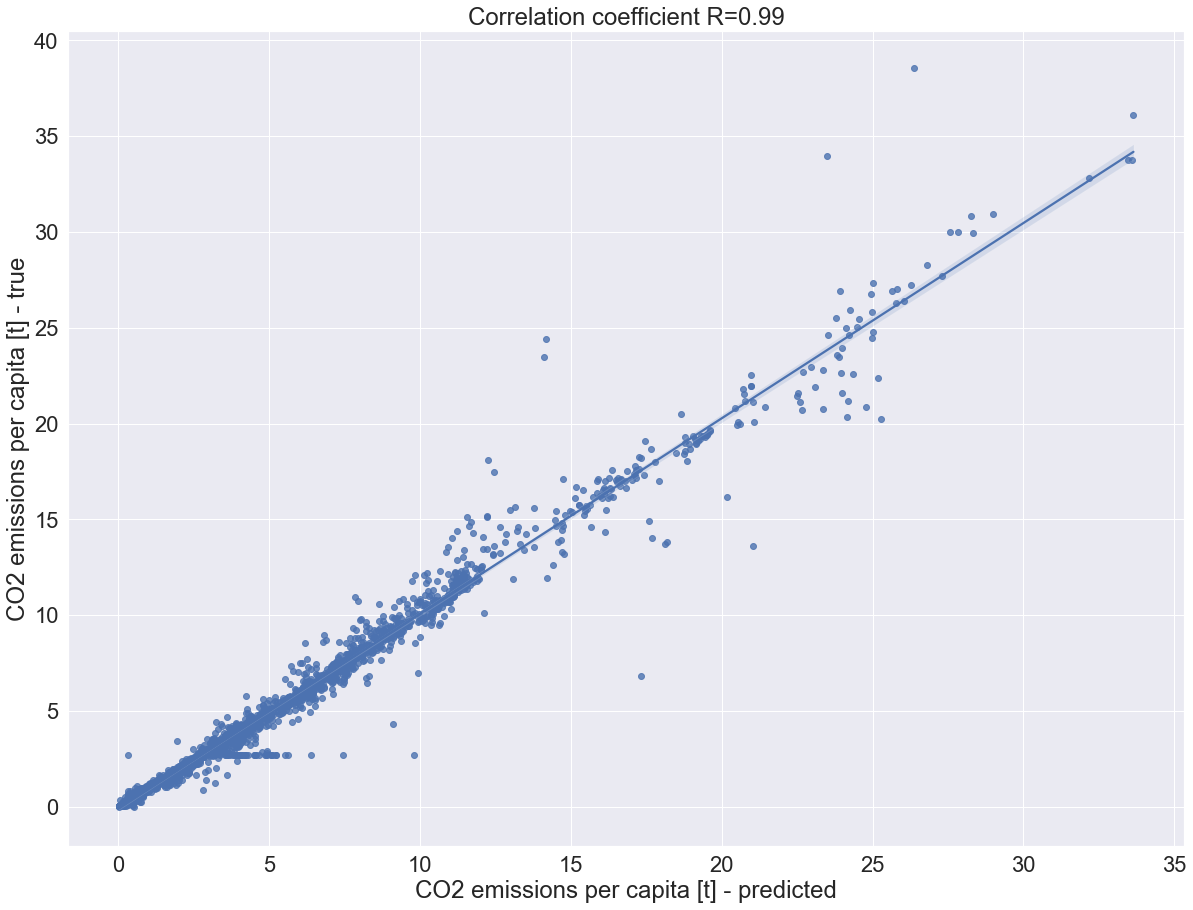

In [50]:
# View plot for actual value from the test subset vs predicted value
f,ax=plt.subplots(figsize=(20,15))
sns.set(font_scale=2)

sns.regplot(x=predictions, y=np.transpose(y_test)[0,:], fit_reg=True)
plt.xlabel("CO2 emissions per capita [t] - predicted")
plt.ylabel("CO2 emissions per capita [t] - true")
plt.title("Correlation coefficient R="+str(round(np.corrcoef(predictions,np.transpose(y_test)[0,:])[0,1],2)))
plt.show()

# Model Persistence 

Finally, the model is saved into root directory to use on deploy it on the backend server.

In [4]:
# Import pickle, a library to store and load machine learning model
import pickle
# Open a file to store the model data
file = open('../model/co2_emission_rf.pkl', 'wb')
# Dump information to that file
pickle.dump(rf_selected_model, file)

NameError: name 'rf_selected_model' is not defined